# Pre-Processing Methods

For correcting exposure inconsistencies within an image, and performing effective smooothing. 

## Steps:
1. Import list of images to find a common correction
2. Determine settings for bilateral filter (edge-preserving)
3. Loop through images

## Step 1: Import list of images to find common correction

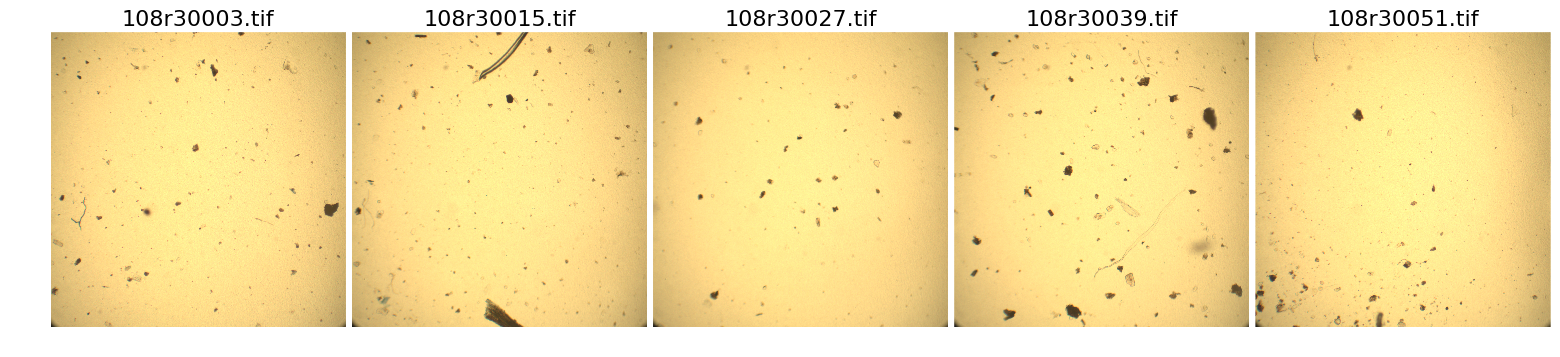

In [5]:
%matplotlib inline

#########################################################################################
dir_in = "/home/patrick/Documents/Jan 20/108rep3/test/"
file_in = ["108r30003.tif", "108r30015.tif", "108r30027.tif", "108r30039.tif", "108r30051.tif"]
#########################################################################################

from matplotlib import pyplot as plt
from skimage import io, color, filters, draw, morphology, exposure, img_as_int, img_as_float, restoration, measure
import pyroots as pr
import numpy as np
from scipy import ndimage
import cv2

img_list = [io.imread(dir_in + i) for i in file_in]
pr.multi_image_plot(img_list, file_in)

In [6]:
#########################################################################################
exposure_args = {'smooth_iterations' : 3,     # times to run pyroots.equalize_exposure (mean filter, smoothed, as correction)
                 'return_variance'   : True,  # variance of mean correction for each pixel? For diagnostics.
                 'threads'           : 3}     # multiprocessing
#########################################################################################


correction = pr.calc_exposure_correction(img_list,
                                         **exposure_args)

percentiles = [0, 0.5, 2.5, 5, 10, 25, 50, 75, 90, 95, 97.5, 99.5, 100]
print('Mean Percentiles: ')
print([np.percentile(correction[0], i) for i in percentiles])
print('\nVariation in Mean, percentiles:')
print([np.percentile(correction[1], i) for i in percentiles])

img = correction
pr.multi_image_plot(img, ['mean', 'variance'])

AttributeError: module 'pyroots' has no attribute 'calc_exposure_correction'

In [3]:
result = [i + correction for i in img_list]

img = result
pr.multi_image_plot(result, file_in)

NameError: name 'correction' is not defined

## Step 2: Settings for Bilateral Filter

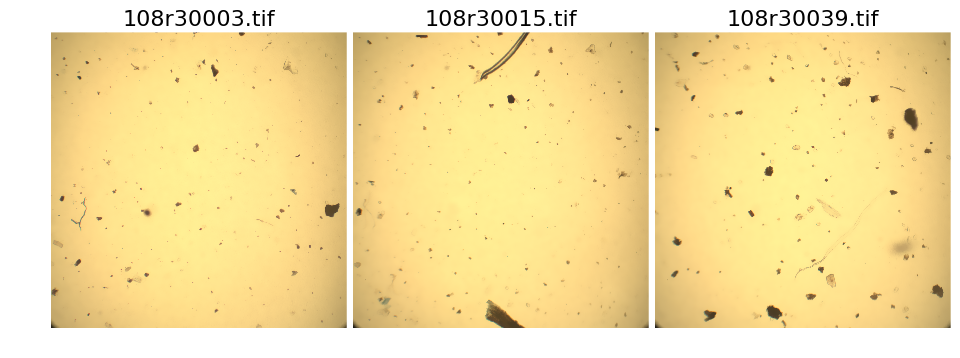

In [7]:
#########################################################################################
bilateral_args = {'sigmaColor' : 25,  # size of gaussian filter (higher smooths more, increases processing)
                  'sigmaSpace' : 15}  # Max difference of influence (higher preserves fewer edges)

test_image = [0, 1, 3]  # what images do you want to run this on? int or list
#########################################################################################

bilat = [cv2.bilateralFilter(img_list[i], -1, **bilateral_args) for i in test_image]

img = bilat
pr.multi_image_plot(img, [file_in[i] for i in test_image])

## Step 3: Loop Through Images

In [ ]:

def image_loop(base_directory, image_extension, correction_image, bilateral_args, 
               out_dir="Pyroots_Preprocessed", save_images=True):
    def _core_fn(file_in):
        img = io.imread(dir_in + file_in)
        
        img = img - correction_image
    
    for subdir, dirs, files in os.walk(base_directory):
        # open dir
# mkdir out
# for each:
    # load images
    # apply correction
    # apply bilateral filter. 
    # save